Through this code we have simulated the BB84 protocol.

BB84 was developed by Bennett and Brassard in 1984 and it was the first quantum key distribution protocol ever designed. It is based on the no-cloning theorem and on the fact that the state is altered when measured. It is provably secure given that  information can only be gained by disturbing the signal applied when the two states being distinguished are non-orthogonal, by the no-cloning theorem and the existence of an authenticated public classical channel. Many QKD protocols are based on the BB84. In BB84, Alice prepares quantum states (photons) in one of two bases chosen. Bob  randomly chooses a measurement basis to decode the information.  If Eve measure this these transmitted photons she cannot replicate the exact ones sent due to the  uncertainty principle.
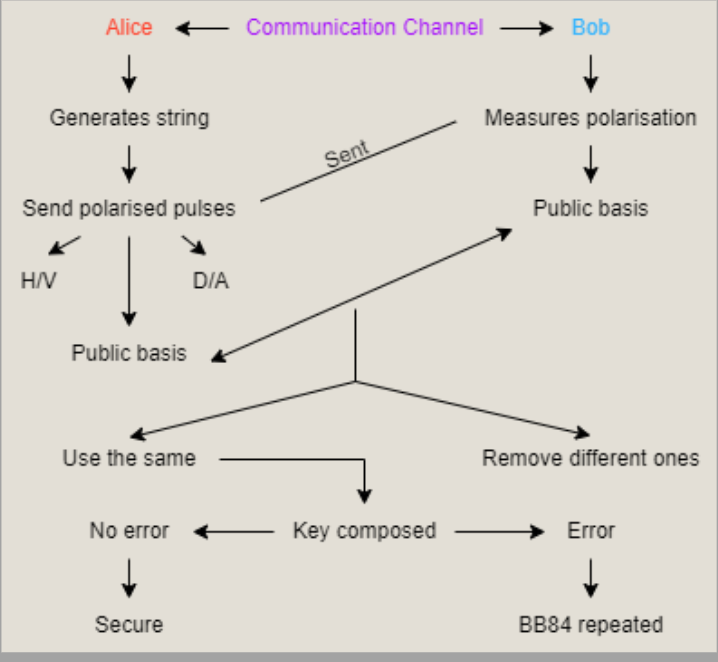

Installation of the necessary files including Qiskit version 0.45.

In [1]:
!pip install qiskit[visualization]==0.45 --quiet
from qiskit import QuantumCircuit,execute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The randint function generates a random string of integers that we require to make a quanutm circuit.

In [2]:
from qiskit import BasicAer
from numpy.random import randint
import numpy as np

Initialising a random combination of zeros and ones for Alice and Bob which will act as both their basis and states. Eve also creates a random basis which she will use to measure the photons sent by Alice.

In [24]:
num_qubits = 8

alice_basis = np.random.randint(2, size=num_qubits)
alice_states = np.random.randint(2, size=num_qubits)

bob_basis = np.random.randint(2, size=num_qubits)
eve_basis = np.random.randint(2, size=num_qubits)

print('Alice basis: ', alice_basis)
print('Bobs basis: ', bob_basis)
print('Alices states: ', alice_states)

Alice basis:  [0 1 0 0 1 0 0 1]
Bobs basis:  [0 1 0 0 1 0 1 1]
Alices states:  [1 1 1 1 1 0 1 1]


A quantum circuit is created using Alice's states.
1. A quantum circuit is initaitlised.
2. Implement an x gate whereve Alice's states is equal to one.
This helps us to create a quantum circuit equaivalent to the random binary string Alice has created which we can send to Bob.

In [25]:
qc=QuantumCircuit(num_qubits)
for i in range(len(alice_states)):
  if alice_states[i]==1:
    qc.x(i)

print('Alices states: ', alice_states)
qc.draw()

Alices states:  [1 1 1 1 1 0 1 1]


┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     ├───┤
q_3: ┤ X ├
     ├───┤
q_4: ┤ X ├
     └───┘
q_5: ─────
     ┌───┐
q_6: ┤ X ├
     ├───┤
q_7: ┤ X ├
     └───┘

Through this snippet we try to implement polarisation on Alice's qubits (photons). We do this by using the random binary combination that Alice generated for her basis.
For example:
1. We consider 1 to be rectilinear and 0 to be diagnol basis.
2. With respect to the basis chosen, gates are applied on the qubits. In other ways we have simulated polarisation through this code snippet.

In [26]:
for i in range(len(alice_basis)):
  if alice_basis[i]==1:
    qc.h(i)

print('Alices basis: ', alice_basis)
qc.draw()

Alices basis:  [0 1 0 0 1 0 0 1]


┌───┐     
q_0: ┤ X ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     ├───┤└───┘
q_2: ┤ X ├─────
     ├───┤     
q_3: ┤ X ├─────
     ├───┤┌───┐
q_4: ┤ X ├┤ H ├
     └───┘└───┘
q_5: ──────────
     ┌───┐     
q_6: ┤ X ├─────
     ├───┤┌───┐
q_7: ┤ X ├┤ H ├
     └───┘└───┘

In [27]:
qc.measure_all()
qc.draw()

┌───┐      ░ ┌─┐                     
   q_0: ┤ X ├──────░─┤M├─────────────────────
        ├───┤┌───┐ ░ └╥┘┌─┐                  
   q_1: ┤ X ├┤ H ├─░──╫─┤M├──────────────────
        ├───┤└───┘ ░  ║ └╥┘┌─┐               
   q_2: ┤ X ├──────░──╫──╫─┤M├───────────────
        ├───┤      ░  ║  ║ └╥┘┌─┐            
   q_3: ┤ X ├──────░──╫──╫──╫─┤M├────────────
        ├───┤┌───┐ ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ┤ X ├┤ H ├─░──╫──╫──╫──╫─┤M├─────────
        └───┘└───┘ ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ───────────░──╫──╫──╫──╫──╫─┤M├──────
        ┌───┐      ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ┤ X ├──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ├───┤┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘└───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/══════════════╩══╩══╩══╩══╩══╩══╩══╩═
                      0  1  2  3  4  5  6  7

In [28]:
backend = BasicAer.get_backend('qasm_simulator')
alice_key=list(execute(qc.reverse_bits(), backend=backend, shots=1).result().get_counts())[0]
print(alice_key)


11110010


**You can run this next snippet of code if you want implement an
eavesdropping situation.**
A new circuit is created for Eve. By iterating witht he help of a for loop we are encoding the new quantum ciruit. For each index, it checks if the corresponding value in eve_basis is equal to 1.
If yes, it applies a Hadamard gate to the qubit at position i.

In [33]:
ops = qc.count_ops()
if 'measure' in ops.keys():
  qc.remove_final_measurements()
else:
  print('no measurements found')

qc=QuantumCircuit(num_qubits)

for i in range(len(bob_basis)):
  if eve_basis[i]==1:
    qc.h(i)

print('Eves basis: ', eve_basis)
qc.measure_all()
qc.draw()


Eves basis:  [1 0 1 0 1 1 0 0]
Alices basis:  [0 1 0 0 1 0 0 1]
Eves basis_  [0 1 0 0 1 0 1 1]
Alices key:  11110010
Eves key:  10101000


**You can run this next snippet of code if you want implement an eavesdropping situation.**

In [18]:
eve_key=list(execute(qc.reverse_bits(), backend=backend, shots=1).result().get_counts())[0]
print('Alices basis: ', alice_basis)
print('Eves basis_ ', bob_basis)
print('Alices key: ', alice_key)
print('Eves key: ', eve_key)

Alices basis:  [1 0 0 0 1 1 0 1]
Eves basis_  [1 0 1 0 1 1 1 0]
Alices key:  11111100
Eves key:  10001000


**You can run this next snippet of code if you want implement an eavesdropping situation.**
This snippet is implementing the measurement scenario of Eve (polarisation).

In [19]:

for i in range(len(eve_basis)):
  if eve_basis[i]==0:
    if eve_key[i]==1:
      qc.x(i)
  else :
    if eve_key[i]==1:
      qc.h(i)
    else:
      qc.x(i)
      qc.h(i)


Now Bob then measures the receives photons the same way as Alice and Eve but measures them using a different combiantion of basis.

In [29]:
ops = qc.count_ops()
if 'measure' in ops.keys():
  qc.remove_final_measurements()
else:
  print('no measurements found')

for i in range(len(bob_basis)):
  if bob_basis[i]==1:
    qc.h(i)

print('Bobs basis: ', bob_basis)
qc.measure_all()
qc.draw()

Bobs basis:  [0 1 0 0 1 0 1 1]


┌───┐           ░ ┌─┐                     
   q_0: ┤ X ├───────────░─┤M├─────────────────────
        ├───┤┌───┐┌───┐ ░ └╥┘┌─┐                  
   q_1: ┤ X ├┤ H ├┤ H ├─░──╫─┤M├──────────────────
        ├───┤└───┘└───┘ ░  ║ └╥┘┌─┐               
   q_2: ┤ X ├───────────░──╫──╫─┤M├───────────────
        ├───┤           ░  ║  ║ └╥┘┌─┐            
   q_3: ┤ X ├───────────░──╫──╫──╫─┤M├────────────
        ├───┤┌───┐┌───┐ ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ┤ X ├┤ H ├┤ H ├─░──╫──╫──╫──╫─┤M├─────────
        └───┘└───┘└───┘ ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ────────────────░──╫──╫──╫──╫──╫─┤M├──────
        ┌───┐┌───┐      ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ┤ X ├┤ H ├──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ├───┤├───┤┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├┤ H ├┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘└───┘└───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═══════════════════╩══╩══╩══╩══╩══╩══╩══╩═
                           0  1  2  3  4  5  6  7

In [30]:
bob_key=list(execute(qc.reverse_bits(), backend=backend, shots=1).result().get_counts())[0]
print('Alices basis: ', alice_basis)
print('Bobs basis_ ', bob_basis)
print('Alices key: ', alice_key)
print('Bobs key: ', bob_key)

Alices basis:  [0 1 0 0 1 0 0 1]
Bobs basis_  [0 1 0 0 1 0 1 1]
Alices key:  11110010
Bobs key:  11111011


Next, Alice and Bob amke their Basis public to each other.
Uisng a for loop, the  bais at every ith postion is checked. If the same basis is used by them both, then we append the qubit at i from Alice's key to an encryption key. This encryption key is what secures the communication channel.

In [31]:
encryption_key=''
for i in range(num_qubits):
  if alice_basis[i] == bob_basis[i]:
    encryption_key +=str(alice_key[i])

print('Key: ', encryption_key)

Key:  1111000


Lastly, using quanutm error detection we check if there is an eavesdropper in the channel. This done by:
1. Creating alice_sample which is nothing but the encryption key.
2. Creating bob_sample which is created the same way as the encryption key but here we append the qubits from bob_key to bob_sample.
3. Using a for loop we compare the samples, and if they do not match with each other at i then an eror has occurred.
4. If the error occurred us greater than a certain percentage, that means an eavesdropper is present.


In [32]:
#to check if eavesdroppng has occurred
error =0;
alice_sample = [alice_key[i] for i in (0, 5)  if alice_basis[i] == bob_basis[i]]
bob_sample = [bob_key[i] for i in (0, 5)  if alice_basis[i] == bob_basis[i]]

for i in (0, 5):
  if(alice_sample!=bob_sample):
    error=error+1

#to check error percentage
error_percentage = (error / 5)*100
if (error_percentage>=20):
  print('Eavesdropping has occurred' )
else:
  print('Eavesdropping has not occurred' )

Eavesdropping has not occurred
